In [42]:
# Revise


#### what is acf and pacf

# acf -> tells the order of MA
# pacf -> tells the order of AR

# AR applies on LAG1
# MA applies on residuals.

# IF stationary ni hai then check through adffuller test.
# and then make it station and apply model ar, ma


# The full form of "ywm" in the context of the plot_pacf function is "Yule-Walker Method".
# It refers to the Yule-Walker equations, which are used to estimate the partial autocorrelation function (PACF) of a time series.

In [43]:
# arima handle trend.
# and we use differencing to remove the trend.

# Differencing

In [44]:
# differencing is a technique to transform non-stationary --> to stationary.# decomposition -> additive and multiplicative

In [45]:
# If stationary then -->  adf test

In [46]:
# trend ko htane ke liye we aare using differecing

In [47]:
# 1st check the df that it is stationary or not.

In [48]:
# ar use krna hai ya ma

# we use the acf and pacf
# these both are showing the autocorrelation

In [49]:
# stationary or not -> adffuller test

# acf and pacf -> to know the order of ar and ma

In [50]:
# decomposITION is used to remove the trend and seasonality

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [52]:
# Load the Shampoo Sales dataset

data = pd.read_csv('shampoo.xls', usecols=[1], names=["Sales"], header=0)

# Loads the dataset containing monthly shampoo sales data.

# Selects only the sales column.

# Assigns a column name "Sales"

In [53]:
data

,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3
5,168.5
6,231.8
7,224.5
8,192.8
9,122.9


In [54]:
# Convert to time series format
data.index = pd.date_range(start="1901-01", periods=len(data), freq="M")

# Converts the dataset into a time sereis format with a monthly frequency

C:\Users\Acer\AppData\Local\Temp\ipykernel_14436\1090059132.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start="1901-01", periods=len(data), freq="M")


In [55]:
data

,Sales
1901-01-31,266.0
1901-02-28,145.9
1901-03-31,183.1
1901-04-30,119.3
1901-05-31,180.3
1901-06-30,168.5
1901-07-31,231.8
1901-08-31,224.5
1901-09-30,192.8
1901-10-31,122.9


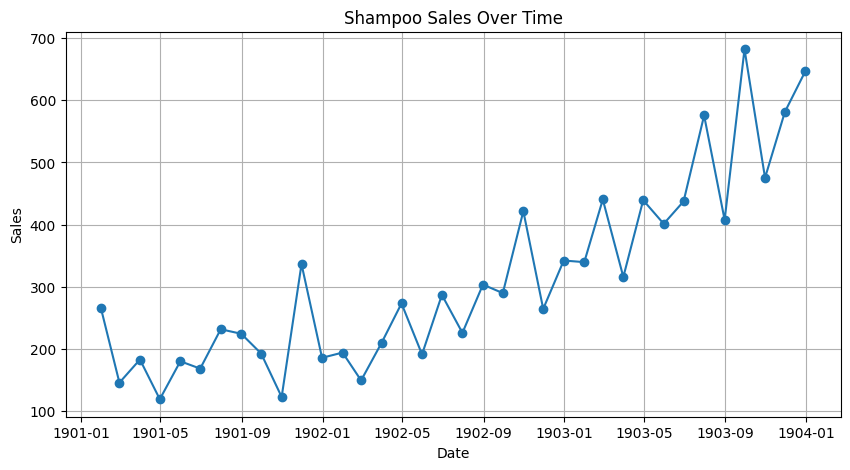

In [56]:
# Visualization the data
plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', linestyle='-')
plt.title("Shampoo Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()



In [57]:
# Check stationary using ADF test
result = adfuller(data['Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("The data is non-stationary. Differencing is required.")
else:
    print("The data is stationary")
    
    
# Dickey-Fuller Test determines if the time series is stationary

# A p-value > 0.005 means the series is non-stationary.. to do see more comments

ADF Statistic: 3.060142083641183
p-value: 1.0
The data is non-stationary. Differencing is required.


In [58]:
# //
result[0]

3.060142083641183

In [59]:
# //
result

(3.060142083641183,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.9972644263031)

In [60]:
# Differencing to make data stationary
data_diff = data.diff().dropna()

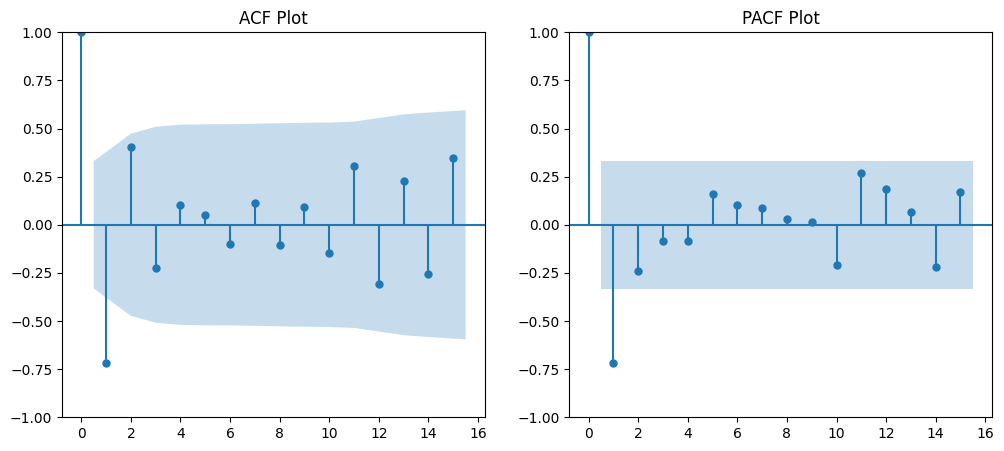

In [61]:
# Plot ACF and PACF to determine p, q values 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data_diff, lags=15, ax=axes[0])
plot_pacf(data_diff, lags=15, method='ywm', ax=axes[1])
axes[0].set_title("ACF Plot")
axes[1].set_title("PACF Plot")
plt.show()

In [62]:
# Explanation of the about plot

# p, d, q

# p = 1
# d = differencing 1

# (p, d, q)
# [ar (pacf), differencing, ma model (acf)]

In [63]:
# Fit Arima model (p,d,q) = (5,1,0) based on ACF/PACF
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()

ARIMA(5,1,0) is choosed based on ACF/PACF analysis.

p = 5 (5 autoregressive lags).

d = 1 (1 differencing step for stationary)

q = 0 (no moving average components).

model.fit() estimates parameters using Maximum Likelihood Estimation (MLE).



In [64]:
# Print model summary
print(model_fit.summary())

# Displays AR coefficients, standard errors, p-values, AIC, BIC.
# Helps analyze if the model is stationary


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 26 Mar 2025   AIC                            408.969
Time:                        16:46:58   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

In [65]:
# Homework
# -----------------------
# read from drive
# what is aic and what is bic

In [66]:
# Forecasting future values
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Forecasts 12 future time points (next 12 months)

# Forecast() generates predicted values based on the trained ARIMA model

C:\Users\Acer\AppData\Local\Temp\ipykernel_14436\3668609337.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq="M")[1:], forecast, label="Forecast", color='red')


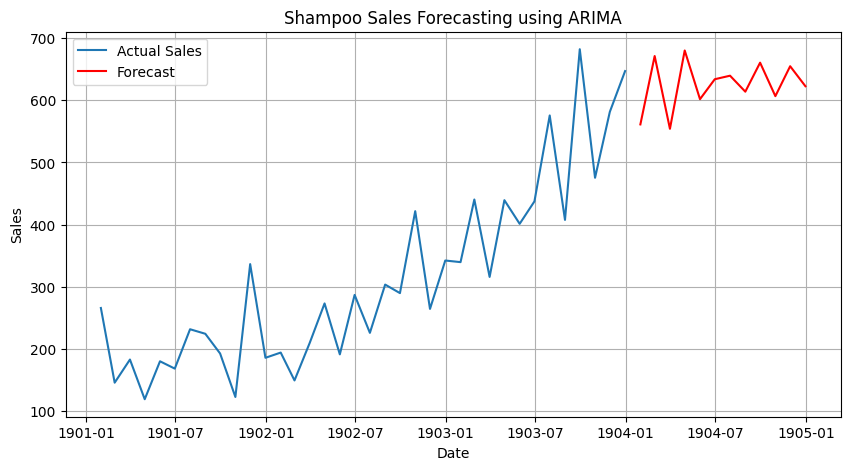

In [67]:
# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(data, label="Actual Sales")
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq="M")[1:], forecast, label="Forecast", color='red') 
plt.title("Shampoo Sales Forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

In [68]:
# Walk Forward ARIMA

In [69]:
df = pd.read_csv('shampoo.xls', header=0, parse_dates=[0])

C:\Users\Acer\AppData\Local\Temp\ipykernel_14436\47240940.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('shampoo.xls', header=0, parse_dates=[0])


In [70]:
data = df['Sales'].values

In [71]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [72]:
# Walk-forward validation

history = train.tolist()
predictions = []

for t in test:
    # Fit AR model
    model = ARIMA(data, order=(5,1,0)) # Using last 7 days for autoregression
    model_fit = model.fit()
    
    # Prediction next value
    y_pred = model_fit.predict(start=len(history), end=len(history))[0]
    predictions.append(y_pred)
    
    # Update history with actual observations
    history.append(t)

In [73]:
# Evalue performance
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Walk-Forward Validation RMSE: {rmse:.4f}')

Walk-Forward Validation RMSE: 77.9935


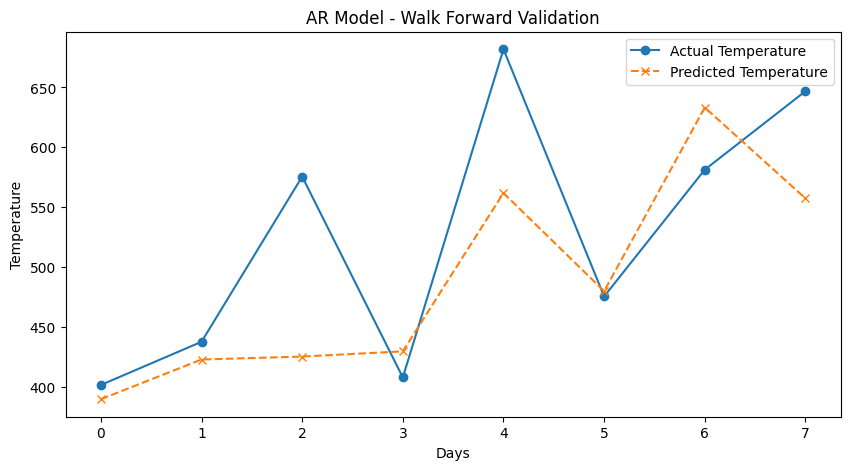

In [74]:
# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test, label='Actual Temperature', marker='o')
plt.plot(predictions, label='Predicted Temperature', marker='x', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('AR Model - Walk Forward Validation')
plt.legend()
plt.show()

In [2]:
# ARIMA and Sarima
# I means integrated means it has trend.

In [ ]:
# ARIMA                  SARIMA

# TREND                 seasonal ARIMA
# (p,    d,    q)              s (p,d,q)
#  |     |     |                (P,D,Q,m)
# AR     |     MA              Trend + Seasonality  
# (PACF) |   (ACF)                 
#       d=1                      P
#                              D
#                              Q
#                              M
                
                
# # Smaller Dataset          Complex





#####8 One more thing 
# auto-arima

In [ ]:
# # TRANSFORMATION




# # Dataset


# 1. Convert it into Time Series

# 2. Decompose 
#        Trend    Seasonality    Residual
    
# 3. Checking stationary using

# ADF Test      


# # see more in the screenshot


In [ ]:
# Biggest Difference Between ARIMA and SARIMA:
# 🔹 ARIMA → Sirf trend ko model karta hai, seasonality ignore karta hai.
# 🔹 SARIMA → Trend + Seasonality dono ko model karta hai (extra P, D, Q, m terms ke saath).

# 👉 Use ARIMA when no seasonality
# 👉 Use SARIMA when clear seasonal patterns exist

In [1]:
# Computational Cost:

# ARIMA: Faster and simpler.

# SARIMA: More complex, takes longer to train due to extra seasonal parameters.

In [ ]:
# arima = only handle tren
# sarima = handle trend + seasonality